In [1]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test

In [2]:
data = pd.read_csv("C:\\Users\\as17s\\OneDrive\\Documents\\MSc Data Science\\Survival analysis\\lung.csv")

In [3]:
data

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
223,224,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0
224,225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0
225,226,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0
226,227,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0


In [4]:
data.columns

Index(['Unnamed: 0', 'inst', 'time', 'status', 'age', 'sex', 'ph.ecog',
       'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [6]:
data.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BD27893A0>,
      dtype=object)

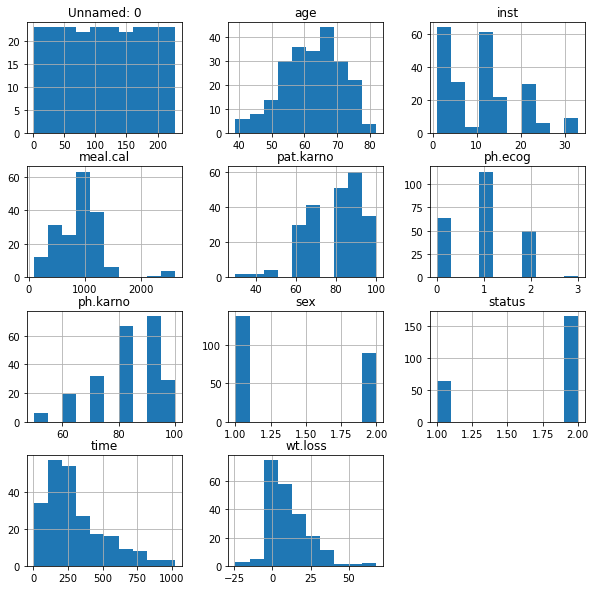

In [7]:
data.hist(figsize = (10,10))

In [8]:
kmf = KaplanMeierFitter()

In [9]:
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1

In [10]:
data

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
223,224,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0,0.0
224,225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0,0.0
225,226,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0,0.0
226,227,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0,0.0


In [11]:
kmf.fit(durations = data['time'], event_observed = data['dead'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [12]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [13]:
kmf.predict([0,5,11,12,13,840])

0      1.000000
5      0.995614
11     0.982456
12     0.978070
13     0.969298
840    0.067127
Name: KM_estimate, dtype: float64

In [14]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


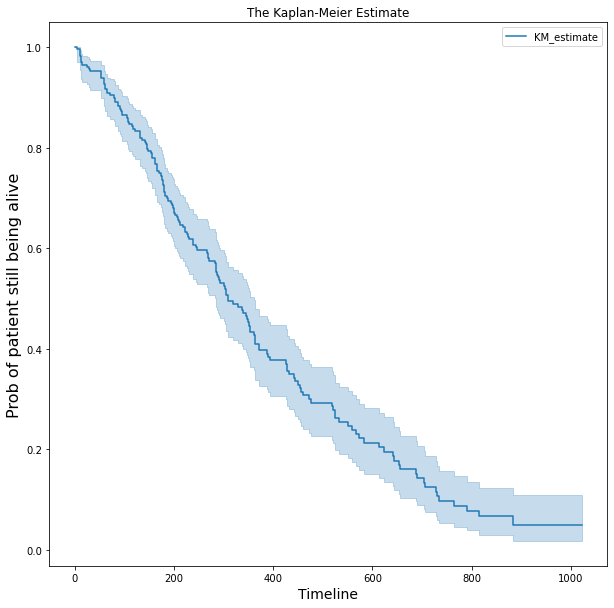

In [15]:
plt.figure(figsize = (10,10))
kmf.plot_survival_function()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Prob of patient still being alive", fontsize = 16)
plt.xlabel("Timeline", fontsize = 14)
plt.show()

In [16]:
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


In [17]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


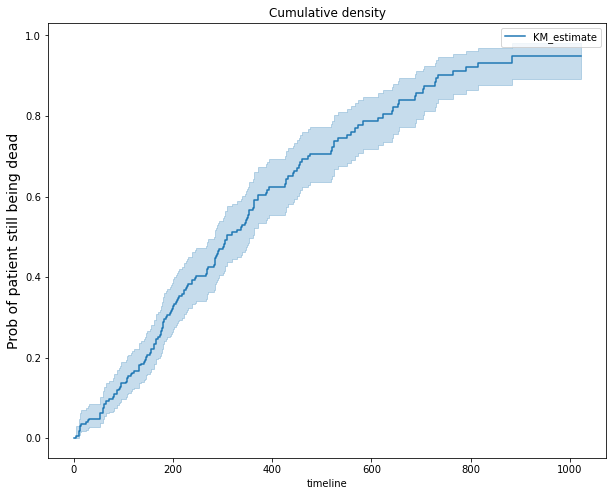

In [18]:
plt.figure(figsize = (10,8))
kmf.plot_cumulative_density()
plt.title("Cumulative density")
plt.ylabel("Prob of patient still being dead", fontsize = 14)
plt.show()

In [19]:
naf = NelsonAalenFitter()
naf.fit(data['time'], event_observed = data['dead'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

In [20]:
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017660
12.0,0.022125
13.0,0.031114
...,...
840.0,2.641565
883.0,2.891565
965.0,2.891565


Text(0.5, 1.0, 'Cumulative Hazard')

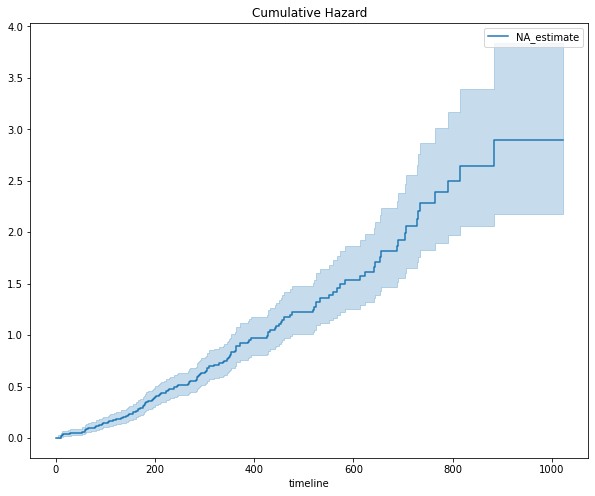

In [21]:
plt.figure(figsize = (10, 8))
naf.plot_cumulative_hazard()
plt.title('Cumulative Hazard')

In [22]:
naf.predict(500)


1.219546171331098

In [23]:
#Test kapan Meier for different groups, these being male and female

kmf_m = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()

In [24]:
Male = data.query("sex == 1")
Female = data.query("sex == 2")

In [25]:
kmf_m.fit(durations = Male['time'], event_observed = Male['dead'], label = 'Male')
kmf_f.fit(durations = Female['time'], event_observed = Female['dead'], label = 'Female')

<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

In [26]:
kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,138,138
11.0,3,3,0,0,138
12.0,1,1,0,0,135
13.0,2,2,0,0,134
15.0,1,1,0,0,132
...,...,...,...,...,...
814.0,1,1,0,0,5
840.0,1,0,1,0,4
883.0,1,1,0,0,3


In [27]:
kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,90,90
5.0,1,1,0,0,90
60.0,1,1,0,0,89
61.0,1,1,0,0,88
62.0,1,1,0,0,87
...,...,...,...,...,...
735.0,1,1,0,0,5
740.0,1,0,1,0,4
765.0,1,1,0,0,3


In [28]:
print('Survival prob for men after 11 days is: ' + str(kmf_m.predict(11)))
print('Survival prob for women after 11 days is: ' + str(kmf_f.predict(11)))

Survival prob for men after 11 days is: 0.9782608695652172
Survival prob for women after 11 days is: 0.9888888888888887


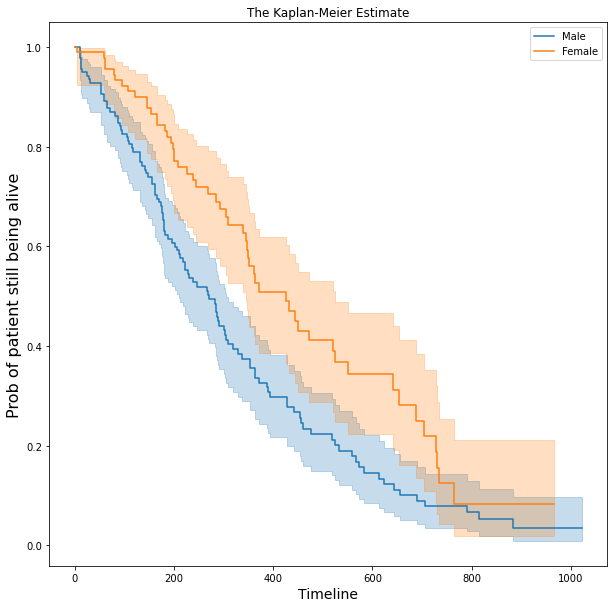

In [29]:
plt.figure(figsize = (10,10))
kmf_m.plot_survival_function()
kmf_f.plot_survival_function()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Prob of patient still being alive", fontsize = 16)
plt.xlabel("Timeline", fontsize = 14)
plt.show()


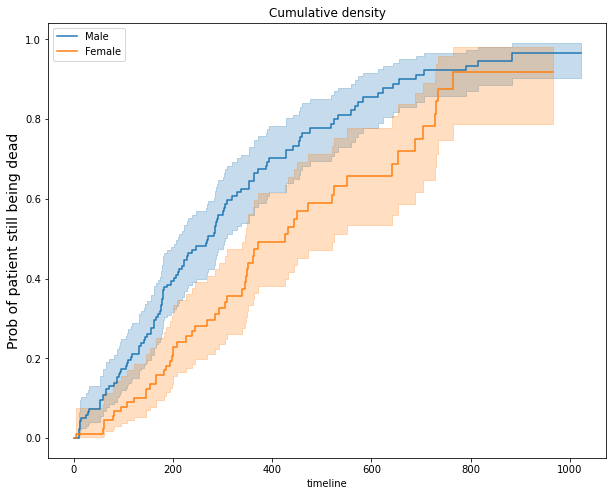

In [30]:
plt.figure(figsize = (10,8))
kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()
plt.title("Cumulative density")
plt.ylabel("Prob of patient still being dead", fontsize = 14)
plt.show()

In [31]:
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(Male['time'], event_observed = Male['dead'], label = 'Male')
naf_f.fit(Female['time'], event_observed = Female['dead'], label = 'Female')

<lifelines.NelsonAalenFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

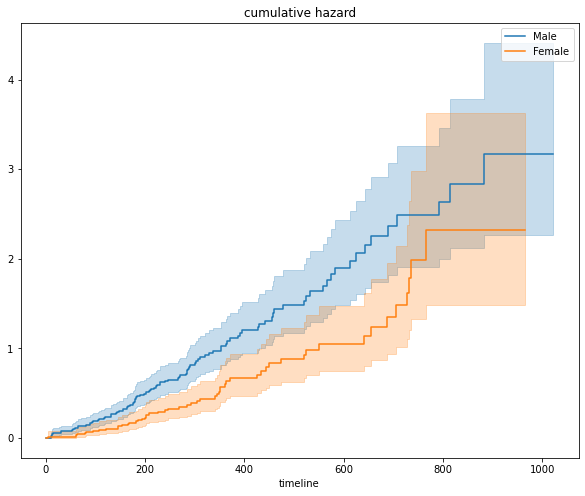

In [32]:
plt.figure(figsize = (10, 8))
plt.title('cumulative hazard')
naf_m.plot_cumulative_hazard()
naf_f.plot_cumulative_hazard()
plt.show()

In [33]:
T = Male['time']
E = Male['dead']
T1 = Female['time']
E1 = Female['dead']

In [34]:
results = logrank_test(T, T1, event_observed_A = E, event_observed_B = E1)
results

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

P-Value indicates <0.005 which is statistically significant, therefore we conclude that sex is a factor in survival days

In [35]:
data1 = data.dropna()

In [36]:
kmf = KaplanMeierFitter()

In [37]:
data1

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
5,6,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0,0.0
6,7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
221,222,11.0,203,1,71,2,1.0,80.0,90.0,1025.0,0.0,0.0
224,225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0,0.0
225,226,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0,0.0
226,227,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0,0.0


In [38]:
kmf.fit(durations = data1['time'], event_observed = data1['dead'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 167 total observations, 47 right-censored observations>

In [39]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,167,167
5.0,1,1,0,0,167
11.0,1,1,0,0,166
12.0,1,1,0,0,165
13.0,1,1,0,0,164
...,...,...,...,...,...
814.0,1,1,0,0,5
821.0,1,0,1,0,4
840.0,1,0,1,0,3


In [40]:
data1 = data1.drop(columns = ['Unnamed: 0', 'inst', 'status'])

In [41]:
cph = CoxPHFitter()
cph.fit(data1, 'time', event_col = 'dead')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2021-04-22 18:00:59 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

              z      p   -log2(p)
covariate                        
age        0.93   0.35       1.51
sex       -2.75   0.01       7.37
ph.ecog    3.29 <0.005       9.95
ph.karno   2.00   0.05       4.45
pat.karno -1.49   0.14       2.87
meal.cal   0.11   0.91       0.13
wt.loss   -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

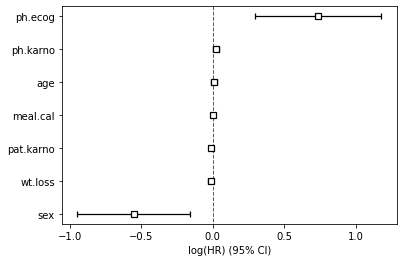

In [42]:
cph.plot()

In [43]:
data1.iloc[0:5]

,time,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
1,455,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
3,210,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
5,1022,74,1,1.0,50.0,80.0,513.0,0.0,0.0
6,310,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,361,71,2,2.0,60.0,80.0,538.0,1.0,1.0


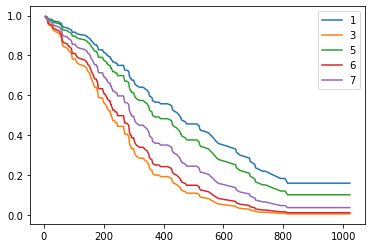

In [44]:
cph.predict_survival_function(data1.iloc[0:5]).plot()

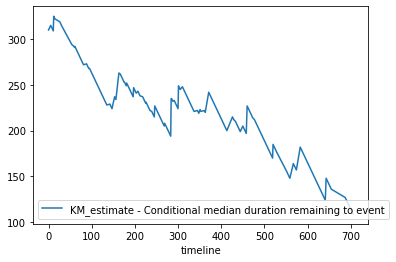

In [45]:
kmf.conditional_time_to_event_.plot()